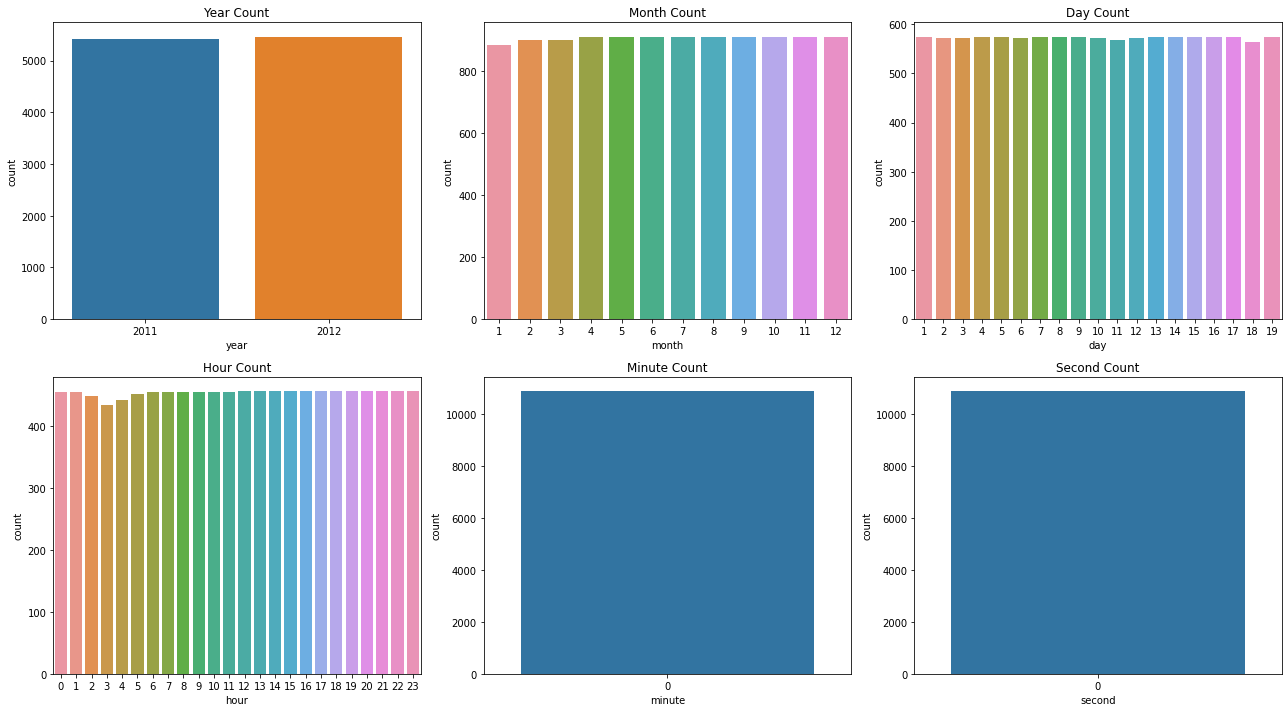

MSE: 19945.3701
RMSE: 141.2281


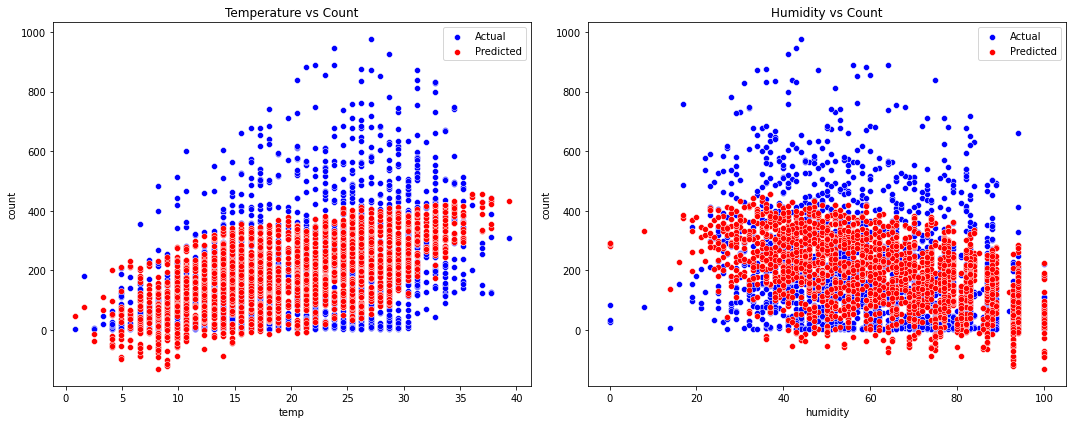

In [2]:
# 필요한 라이브러리 임포트
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# (1) 데이터 가져오기
# ~/data/data/bike-sharing-demand 경로에서 데이터를 읽어옵니다.
data_path = "~/data/data/bike-sharing-demand/train.csv"
train = pd.read_csv(data_path)

# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초 컬럼 생성하기
train['datetime'] = pd.to_datetime(train['datetime'])  # datetime 컬럼을 datetime 자료형으로 변환
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
# sns.countplot을 사용해 각 컬럼의 데이터 개수를 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.countplot(x='year', data=train, ax=axes[0, 0])
axes[0, 0].set_title("Year Count")

sns.countplot(x='month', data=train, ax=axes[0, 1])
axes[0, 1].set_title("Month Count")

sns.countplot(x='day', data=train, ax=axes[0, 2])
axes[0, 2].set_title("Day Count")

sns.countplot(x='hour', data=train, ax=axes[1, 0])
axes[1, 0].set_title("Hour Count")

sns.countplot(x='minute', data=train, ax=axes[1, 1])
axes[1, 1].set_title("Minute Count")

sns.countplot(x='second', data=train, ax=axes[1, 2])
axes[1, 2].set_title("Second Count")

plt.tight_layout()
plt.show()

# (4) X, y 컬럼 선택 및 train/test 데이터 분리
# 'casual', 'registered', 'minute', 'second' 컬럼 제외 (학습 시 불필요한 분, 초 컬럼 제거)
#casual(비회원 대여량)과 registered(회원 대여량)는 자전거 대여량(count)을 구성하는 요소이므로, 
#이 컬럼들이 포함되면 count 값을 과적합하게 예측하게 되어 제거

X = train.drop(['datetime', 'casual', 'registered', 'count', 'minute', 'second'], axis=1)  # 특성 컬럼 선택
y = train['count']  # 타겟 변수

# train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (5) LinearRegression 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
y_pred = model.predict(X_test)

# 손실 함수 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# (7) temp 또는 humidity로 x축, count로 y축 시각화
# temp와 humidity에 따른 count 예측 결과 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# temp vs count
sns.scatterplot(x=X_test['temp'], y=y_test, color='blue', label="Actual", ax=axes[0])
sns.scatterplot(x=X_test['temp'], y=y_pred, color='red', label="Predicted", ax=axes[0])
axes[0].set_title("Temperature vs Count")

# humidity vs count
sns.scatterplot(x=X_test['humidity'], y=y_test, color='blue', label="Actual", ax=axes[1])
sns.scatterplot(x=X_test['humidity'], y=y_pred, color='red', label="Predicted", ax=axes[1])
axes[1].set_title("Humidity vs Count")

plt.tight_layout()
plt.show()
